In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
#from top_level_features import hog_features
import time
#from top_level_features import color_histogram_hsv
#from top_level_features import extract_features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from skimage.transform import resize
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline
print("=================== Packages Loaded ===================")

=================== Packages Loaded ===================


=================== Loading Data ===================
Image 1 : Ragu 	 2:Carbonara 	 3:Lasagna 	 4:gnocchi


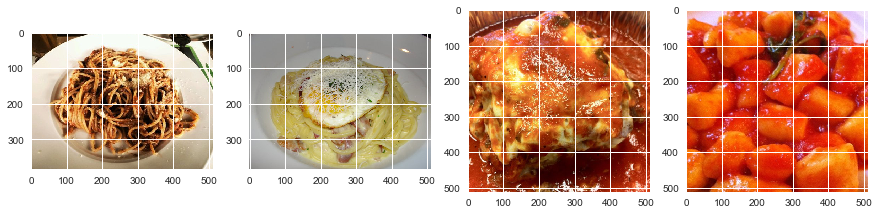

In [3]:
print("=================== Loading Data ===================")
root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'
gnocchi_dir = 'gnocchi/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))
all_gnocchi = os.listdir(os.path.join(root_dir, gnocchi_dir))

print("Image 1 : Ragu \t 2:Carbonara \t 3:Lasagna \t 4:gnocchi")
fig, ax = plt.subplots(1,4, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_carbonara)
img = plt.imread(os.path.join(root_dir, carbonara_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_lasagna)
img = plt.imread(os.path.join(root_dir, lasagna_dir, rand_img))
ax[2].imshow(img)

rand_img = np.random.choice(all_gnocchi)
img = plt.imread(os.path.join(root_dir, gnocchi_dir, rand_img))
ax[3].imshow(img)

plt.show()

In [4]:
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================


In [5]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 70:30 ===================")
X = np.array(all_imgs)
Y = np.array(all_labels)
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 70:30 ===================
For Main Data Set : 3999
For Train Set : 2799
For Test Set : 1200


In [6]:
unique, counts = np.unique(Y, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 1000]
 [   1 1000]
 [   2  999]
 [   3 1000]]


### Here essentially I am running multiple SVM's for classification to find optimal c Value
> Lower C value leads to more flexiblity and leads to higher training error
>
> Higher C value leads to less flexibility and leads to lower training error

Acc Train: 0.956056, Acc Test:0.393333
Acc Train: 1.000000, Acc Test:0.377500
Acc Train: 1.000000, Acc Test:0.377500


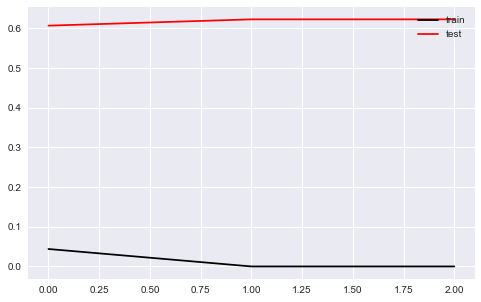

In [11]:
C_values = [0.001,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

### Performing cross validation and checking which combination of svm with a different kernel gives awesome results

In [12]:
start_time = time.time()
models = (
          svm.SVC(kernel='rbf', C=0.001),
          svm.SVC(kernel='rbf', gamma=10, C=0.001),
          svm.SVC(kernel='sigmoid', C=0.001, gamma=0.1),
          svm.SVC(kernel='poly', degree=2, gamma=0.5, C=0.001))

X_train_s, X_val, Y_train_s, Y_val = train_test_split(x_train, y_train, test_size=0.3)

for idx,model in enumerate(models):
    model.fit(X_train_s,Y_train_s)
    tr_error = 1-model.score(X_train_s,Y_train_s)
    val_error = 1-model.score(X_val,Y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

Model:0, Train Error:0.742726, Val Error:0.763095, Test Error:0.753333
Model:1, Train Error:0.742726, Val Error:0.763095, Test Error:0.753333
Model:2, Train Error:0.742726, Val Error:0.763095, Test Error:0.753333
Model:3, Train Error:0.000000, Val Error:0.659524, Test Error:0.613333
Duration: --- 21.41076537768046 Minutes ---


| Model Number | Train prediction |	Validation Prediction |	Test Prediction |
| ------------ | ---------------- | --------------------- | --------------- |
|0|	0.75855|	0.734524|	0.74667|
|1|	0.75855|	0.734524|	0.74667|
|2|	0.75855|	0.734524|	0.74667|
|3|	1|	        0.686905|	0.7325|

### Transforming data into HOG Format
Will work on Hog Error later

In [42]:
features = extract_features(X,[hog_features, color_histogram_hsv]) 
scaler = StandardScaler()
X = scaler.fit_transform(features)

x_hog_train, x_hog_test, y_hog_train, y_hog_test = train_test_split(X, Y, test_size=0.2, random_state=42)

(3999, 65, 65, 3)


TypeError: slice indices must be integers or None or have an __index__ method

In [56]:

unique, counts = np.unique(y_train, return_counts=True)

print (np.asarray((unique, counts)).T)

[[0.000e+00 2.103e+03]
 [1.000e+00 6.960e+02]]


### Running SVM on HOG data based on the winner model from above

In [7]:
clf = svm.SVC(kernel='poly', degree=2, gamma=0.5, C=0.001)
clf.fit(x_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.5, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
start_time = time.time()

model=clf
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0    1   2    3
Predicted                   
0          103   40  95   64
1           86  179  52  101
2           54   32  86   32
3           71   53  63   89
             precision    recall  f1-score   support

          0       0.34      0.33      0.33       314
          1       0.43      0.59      0.50       304
          2       0.42      0.29      0.34       296
          3       0.32      0.31      0.32       286

avg / total       0.38      0.38      0.37      1200

0.38083333333333336
Duration: --- 3.7209397395451864 Minutes ---


# Enough with SVMS Moving to ANN

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

In [32]:
model = Sequential()
model.add(Dense(500,input_dim=12675))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [33]:
X_train_s, X_val, Y_train_s, Y_val = train_test_split(x_train, y_train, test_size=0.3)
print("For Train Set :",len(X_train_s))
print("For Validation Set :",len(X_val))

For Train Set : 1959
For Validation Set : 840


In [34]:
X_train_s.shape

(1959, 12675)

In [35]:
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [36]:
batch_size = 128
n_epochs = 50

history = model.fit(X_train_s,Y_train_s,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_val, Y_val))


with open('FNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 1959 samples, validate on 840 samples
Epoch 1/20
 - 9s - loss: -6.1878e+00 - acc: 0.2409 - val_loss: -9.1795e+00 - val_acc: 0.2488
Epoch 2/20
 - 6s - loss: -7.5369e+00 - acc: 0.2486 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 3/20
 - 6s - loss: -7.7034e+00 - acc: 0.2486 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 4/20
 - 6s - loss: -7.7382e+00 - acc: 0.2496 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 5/20
 - 6s - loss: -7.7470e+00 - acc: 0.2501 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 6/20
 - 6s - loss: -7.7142e+00 - acc: 0.2486 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 7/20
 - 7s - loss: -7.7574e+00 - acc: 0.2496 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 8/20
 - 6s - loss: -7.7772e+00 - acc: 0.2481 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 9/20
 - 6s - loss: -7.7752e+00 - acc: 0.2476 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 10/20
 - 6s - loss: -7.8374e+00 - acc: 0.2491 - val_loss: -9.1859e+00 - val_acc: 0.2488
Epoch 11/20
 - 6s - lo

In [47]:
history['acc']

TypeError: 'History' object is not subscriptable

In [42]:
#import pickle

#with open('FNN_history.history', 'r') as file_pi:
#    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(target_w, target_h, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))


with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

### CONVO

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

with open('CNN_history.history', 'r') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Pre Trained Net

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize as resize

root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
#all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))

import matplotlib.image as img
#from skimage.transform import resize

target_w = 299
target_h = 299
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

# for img_name in all_lasagna:
#     img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
#     w,h,d = img_arr.shape
#     img_arr_rs = img_arr
#     img_arr_rs = resize(img_arr, (target_w, target_h))
#     all_imgs.append(img_arr_rs)
#     all_imgs_orig.append(img_arr)
#     all_labels.append(2)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split


X = np.array(all_imgs, dtype=np.float32)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

X = preprocess_input(X)
print(X.shape)

features = model.predict(X)

#np.save("pasta_features",features)

print(features.shape)
print(type(features))

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(9,9,512)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 200

features_train, features_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

history = model.fit(features_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2, validation_data=(features_test, Y_test))


In [ ]:
import pickle

with open('VGG16_based_history.history', 'r') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()